In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crypto_data.csv")
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# break out the various "prrof" types as there appears to be duplicated due to spelling differences
df.ProofType.value_counts()

PoW                                      535
PoW/PoS                                  468
PoS                                      185
DPoS                                      21
PoS/PoW                                    5
PoA                                        3
PoC                                        3
PoW/PoS                                    2
LPoS                                       2
PoW/DPoW                                   1
PoW and PoS                                1
Proof of Trust                             1
PoS/PoB                                    1
DPoC                                       1
PoS/LPoS                                   1
DPoI                                       1
POBh                                       1
Pos                                        1
PoW/nPoS                                   1
 PoW/PoS                                   1
POS / MN                                   1
DPOS                                       1
PoS/PoW/Po

In [4]:
df.describe()

,TotalCoinsMined
count,7.440000e+02
mean,3.883103e+09
std,3.867263e+10
min,-5.917978e+09
25%,6.322164e+05
50%,1.340427e+07
75%,9.399895e+07
max,9.899887e+11


In [5]:
# break out the columns to identify any columns with null or blanlk entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [6]:
# total coin supply is not a number as it is listed as an object (string)

In [7]:
# pd.to_numeric(df.TotalCoinSupply)  unable to convert due to the spaces in the string at position 427

In [8]:
# drop coins that are not being traded. 
df_sub = df.copy()

df_sub = df_sub.loc[df_sub.IsTrading == True].reset_index(drop=True)

df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1144 non-null   object 
 1   CoinName         1144 non-null   object 
 2   Algorithm        1144 non-null   object 
 3   IsTrading        1144 non-null   bool   
 4   ProofType        1144 non-null   object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 54.9+ KB


In [9]:
df_sub = df_sub.dropna(how="any").reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 32.9+ KB


In [10]:
df_sub.sort_values(by="TotalCoinsMined")

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
667,FIII,Fiii,SHA3-256,True,DPoC,-5.917978e+09,5000000000
408,LBTC,LiteBitcoin,Scrypt,True,PoW,0.000000e+00,1000000000
101,RIPO,RipOffCoin,Scrypt,True,PoW,0.000000e+00,12000000
291,BASH,LuckChain,Scrypt,True,PoW/PoS,0.000000e+00,1000000000
287,CSH,CashOut,SHA-256,True,PoW,0.000000e+00,100000000
...,...,...,...,...,...,...,...
571,QWC,Qwertycoin,CryptoNight Heavy,True,PoW,9.955311e+10,184470000000
407,NYC,NewYorkCoin,Scrypt,True,PoW,1.430067e+11,0
395,GCN,gCn Coin,Scrypt,True,PoW,1.630551e+11,200000000000
136,BCN,ByteCoin,CryptoNight,True,PoW,1.840668e+11,184467440735


In [11]:
# drop all coins that have none mined 
mask = df_sub.TotalCoinsMined > 0
df_sub = df_sub.loc[mask].reset_index(drop=True)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 25.6+ KB


In [12]:
# total coin supply converted from an object to a float. 
df_sub["TotalCoinSupply"] = pd.to_numeric(df_sub.TotalCoinSupply)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    float64
dtypes: bool(1), float64(2), object(4)
memory usage: 25.6+ KB


In [13]:
# look for x within x and list out the value labels in order to get consistency among the various "proof" types 
[x for x in df_sub.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'PoW/nPoS',
 'Pos',
 'LPoS',
 'Zero-Knowledge Proof',
 'POBh',
 'PoS/LPoS',
 'PoW/PoW',
 'PoA',
 'Proof of Trust',
 'Proof of Authority',
 'PoW + Hive',
 'PoW and PoS',
 'DPOS',
 'TPoS',
 'PoW/PoS ',
 'dPoW/PoW',
 'PoST',
 'PoS/PoW/PoT',
 'HPoW']

In [14]:
# rename the duplicates into one label type. 
df_sub.loc[df_sub.ProofType == "PoW/PoS ", "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == "Pos", "ProofType"] = "PoS"
df_sub.loc[df_sub.ProofType == "Proof of Authority", "ProofType"] = "PoA"
df_sub.loc[df_sub.ProofType == "PoW and PoS", "ProofType"] = "PoW/PoS"
df_sub.loc[df_sub.ProofType == "Proof of Trust", "ProofType"] = "PoT"

In [15]:
# duplicated values have been relabled in order to clean up the data  
[x for x in df_sub.ProofType.value_counts().index]

['PoW',
 'PoW/PoS',
 'PoS',
 'DPoS',
 'PoC',
 'PoS/PoW',
 'PoA',
 'POBh',
 'PoT',
 'PoW/nPoS',
 'LPoS',
 'Zero-Knowledge Proof',
 'PoS/LPoS',
 'PoW/PoW',
 'PoW + Hive',
 'DPOS',
 'TPoS',
 'dPoW/PoW',
 'PoST',
 'PoS/PoW/PoT',
 'HPoW']

In [16]:
coin_sub = df_sub.CoinName

df_sub.drop(["Unnamed: 0", "CoinName", "IsTrading"], axis=1, inplace=True)
df_sub.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [17]:
# one hot encoding the algorithm and ProofType columns per the homework instructions (dummy variable)
df2_sub = pd.get_dummies(df_sub)
df2_sub.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


now look at dimensionality reduction and do not one hot encoding the columns that are already encoded.  
- standard scaler python for guidance on encoding part of the data set 

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# transform coins mined and coin supply as they are the only columns that are not zeros and 1s (due to the get dummmies 
# transformation.  not clear as to why we would scale all of the columns)
scaler = StandardScaler()
scaler = scaler.fit(df2_sub.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])

In [20]:
# total coins mined and supply have been scaled down to manageble sizes for the visuals.
df3_sub = df2_sub.copy()

df3_sub.loc[:,["TotalCoinsMined", "TotalCoinSupply"]] = scaler.transform(df2_sub.loc[:, ["TotalCoinsMined", "TotalCoinSupply"]])
df3_sub.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoST,ProofType_PoT,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117108,-0.152870,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.093970,-0.145009,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.524946,4.489424,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.116715,-0.152560,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.114747,-0.152870,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df3_sub)
tsne_features.shape

(532, 2)

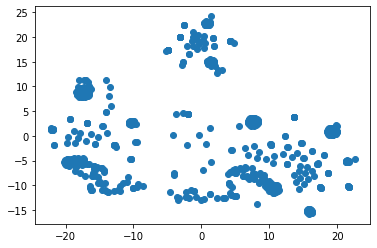

In [23]:
 # slap it on a chart 
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Implement the PCA (principal component analysis) section 

In [24]:
from sklearn.decomposition import PCA

In [25]:
pca = PCA()
pca.fit(df3_sub)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[4.86144130e-01 1.12847212e-01 8.45960792e-02 7.32508093e-02
 5.77306595e-02 3.17660063e-02 1.97031162e-02 9.52271975e-03
 8.92066253e-03 8.21403709e-03 7.70118235e-03 6.28819177e-03
 5.84877136e-03 5.28749132e-03 4.91337373e-03 4.80729200e-03
 3.99735722e-03 3.58612184e-03 3.08181848e-03 2.57597086e-03
 2.14115526e-03 2.14115526e-03 2.14114718e-03 2.14049574e-03
 2.12771942e-03 2.04914070e-03 1.84226967e-03 1.74607547e-03
 1.70605685e-03 1.60585516e-03 1.60125900e-03 1.52901629e-03
 1.47672963e-03 1.36767814e-03 1.26603922e-03 1.07747272e-03
 1.07057763e-03 1.07057763e-03 1.07057763e-03 1.07057763e-03
 1.07057763e-03 1.06898100e-03 1.06334477e-03 1.05790525e-03
 1.02509486e-03 9.85277904e-04 7.99635191e-04 7.04929971e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.35288814e-04 5.35288814e-04 5.35288814e-04
 5.35288814e-04 5.352888

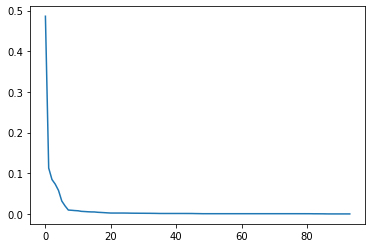

In [26]:
# the numbers above dont really tell the story, we will place into a visual to help it be more understandable 
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.show()

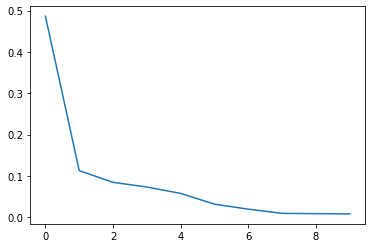

In [27]:
# reduce range as the above elbow curve is hard to see where it starts to flatten 
plt.plot(range(10), pca.explained_variance_ratio_[0:10])
plt.show()

In [28]:
# the first 10 components gives us an idea of what impact the PCAs have, this wil help to identify how 
# many components are needed.  
pca.explained_variance_ratio_[0:10]

array([0.48614413, 0.11284721, 0.08459608, 0.07325081, 0.05773066,
       0.03176601, 0.01970312, 0.00952272, 0.00892066, 0.00821404])

In [29]:
# with 8 of the PCAs
np.sum(pca.explained_variance_ratio_[0:8])

0.8755607322142902

In [30]:
 np.sum(pca.explained_variance_ratio_[0:10])

0.8926954318321767

In [31]:
np.sum(pca.explained_variance_ratio_[0:11])

0.900396614178474

In [32]:
# no additional gains after 11 components
np.sum(pca.explained_variance_ratio_[0:12])

0.9066848059514387

In [33]:
pca = PCA(n_components=0.90)  # this will keep 90% of the components and give us a PCA result of 0.900396614178474
pca.fit(df3_sub)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48614413 0.11284721 0.08459608 0.07325081 0.05773066 0.03176601
 0.01970312 0.00952272 0.00892066 0.00821404 0.00770118]
0.900396614178474


In [34]:
 print(len(pca.explained_variance_ratio_))

11


In [35]:
pca = PCA(n_components=0.95)  # 95% produced a result of 0.9514746756020571, but more than doubled the amount of 
# components needed. 
pca.fit(df3_sub)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48614413 0.11284721 0.08459608 0.07325081 0.05773066 0.03176601
 0.01970312 0.00952272 0.00892066 0.00821404 0.00770118 0.00628819
 0.00584877 0.00528749 0.00491337 0.00480729 0.00399736 0.00358612
 0.00308182 0.00257597 0.00214116 0.00214116 0.00214115 0.0021405
 0.00212772]
0.9514746756020571


In [36]:
 print(len(pca.explained_variance_ratio_))

25


In [37]:
pca = PCA(n_components=0.99)  # 99% produced a result of 0.990435524204901, but the components needed to produce .09
# improvement required 6 times the amount of components.  this could slow down your systems for such a minor increase. 
pca.fit(df3_sub)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48614413 0.11284721 0.08459608 0.07325081 0.05773066 0.03176601
 0.01970312 0.00952272 0.00892066 0.00821404 0.00770118 0.00628819
 0.00584877 0.00528749 0.00491337 0.00480729 0.00399736 0.00358612
 0.00308182 0.00257597 0.00214116 0.00214116 0.00214115 0.0021405
 0.00212772 0.00204914 0.00184227 0.00174608 0.00170606 0.00160586
 0.00160126 0.00152902 0.00147673 0.00136768 0.00126604 0.00107747
 0.00107058 0.00107058 0.00107058 0.00107058 0.00107058 0.00106898
 0.00106334 0.00105791 0.00102509 0.00098528 0.00079964 0.00070493
 0.00053529 0.00053529 0.00053529 0.00053529 0.00053529 0.00053529
 0.00053529 0.00053529 0.00053529 0.00053529 0.00053529 0.00053529
 0.00053529 0.00053529 0.00053529 0.00053529 0.00053529 0.00053529]
0.990435524204901


In [38]:
print(len(pca.explained_variance_ratio_))

66


In [39]:
pca = PCA(n_components=0.90)  # we will go with 90% per the homework instructions 
pca.fit(df3_sub)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

[0.48614413 0.11284721 0.08459608 0.07325081 0.05773066 0.03176601
 0.01970312 0.00952272 0.00892066 0.00821404 0.00770118]
0.900396614178474


In [40]:
print(len(pca.explained_variance_ratio_))

11


In [41]:
df_pca = pca.transform(df3_sub)
df_pca = pd.DataFrame(df_pca, columns = ["PCA"+ str(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776


In [42]:
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

(532, 2)

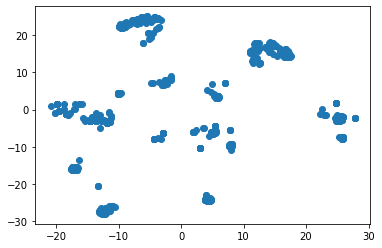

In [43]:
# and chart for visual 
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [44]:
from sklearn.cluster import KMeans

C:\Users\arnol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


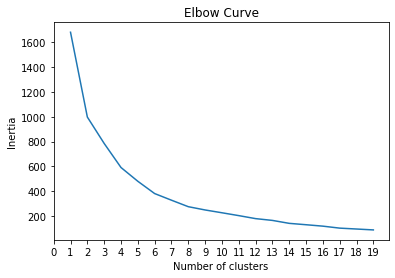

In [45]:
# Find optimal x, pulled over from lessons 
inertia = []
k = list(range(1, 20))


# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(20)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [46]:
# Predicting clusters with k=6

# Initialize the k-means model
model = KMeans(n_clusters=6, random_state=0)

# Fit the model
model.fit(df_pca)

# Predict clusters
predictions = model.predict(df_pca)

# Add the predicted class column to the dataframe
df_pca["class"] = model.labels_
df_pca.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,class
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774,0
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660,0
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091,2
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113,5
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776,5


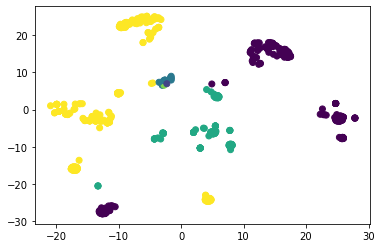

In [47]:
 # Visualize the clusters
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df_pca["class"])
plt.show()

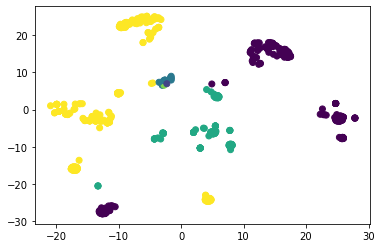

In [48]:
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=df_pca["class"])
plt.savefig(r'TSNE scatter.png', dpi = 100)

In [49]:
df_pca["class"].value_counts()

5    229
0    182
3    109
2     10
1      1
4      1
Name: class, dtype: int64

In [50]:
df_sub.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [51]:
classes = df_pca["class"]
df_pca["coin"] = coin_sub

In [52]:
preds = df_sub.copy()
preds["coin"] = coin_sub
preds["class"] = classes

preds.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,42 Coin,0
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,404Coin,0
2,X13,PoW/PoS,2.927942e+10,3.141593e+11,EliteCoin,2
3,SHA-256,PoW,1.792718e+07,2.100000e+07,Bitcoin,5
4,Ethash,PoW,1.076842e+08,0.000000e+00,Ethereum,5


In [53]:
preds.groupby("class").mean()

,TotalCoinsMined,TotalCoinSupply
class,,
0,2.492499e+09,3.204951e+09
1,9.899887e+11,9.900000e+11
2,8.841782e+10,1.720409e+11
3,1.649582e+09,3.587962e+09
4,5.313984e+10,1.000000e+12
5,1.224351e+09,3.575834e+09


In [54]:
preds.groupby("class").count()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin
class,,,,,
0,182,182,182,182,182
1,1,1,1,1,1
2,10,10,10,10,10
3,109,109,109,109,109
4,1,1,1,1,1
5,229,229,229,229,229


In [55]:
preds.loc[preds["class"] == 1]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
525,TRC10,DPoS,9.899887e+11,9.900000e+11,BitTorrent,1


In [56]:
preds.loc[preds["class"] == 4]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
370,CryptoNight,PoW,5.313984e+10,1.000000e+12,TurtleCoin,4


In [57]:
preds.sort_values(by="TotalCoinsMined", ascending=False)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
525,TRC10,DPoS,9.899887e+11,9.900000e+11,BitTorrent,1
98,CryptoNight,PoW,1.840668e+11,1.844674e+11,ByteCoin,2
294,Scrypt,PoW,1.630551e+11,2.000000e+11,gCn Coin,2
305,Scrypt,PoW,1.430067e+11,0.000000e+00,NewYorkCoin,2
443,CryptoNight Heavy,PoW,9.955311e+10,1.844700e+11,Qwertycoin,2
...,...,...,...,...,...,...
415,CryptoNight,PoW,8.430000e+04,6.000005e+08,PlatinCoin,5
29,Scrypt,PoW/PoS,4.257948e+04,5.000000e+05,BitBar,0
77,X11,PoW/PoS,1.177000e+03,1.000000e+03,SyncCoin,0
21,Scrypt,PoW,8.800000e+01,3.840000e+11,MoonCoin,2


In [58]:
preds.loc[preds["class"] == 5].head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
3,SHA-256,PoW,1.792718e+07,2.100000e+07,Bitcoin,5
4,Ethash,PoW,1.076842e+08,0.000000e+00,Ethereum,5
5,Scrypt,PoW,6.303924e+07,8.400000e+07,Litecoin,5
7,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,Monero,5
8,Ethash,PoW,1.133597e+08,2.100000e+08,Ethereum Classic,5
9,Equihash,PoW,7.383056e+06,2.100000e+07,ZCash,5
11,Multiple,PoW,1.140622e+10,2.100000e+10,DigiByte,5
14,Scrypt,PoW,5.768310e+06,2.100000e+07,ProsperCoin,5
16,X11,PoW,1.114973e+07,2.000000e+07,Spreadcoin,5
17,Scrypt,PoW,1.220580e+07,6.400000e+07,Argentum,5


In [59]:
preds.loc[preds.coin == "Nano"]

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,coin,class
278,Blake2b,PoW,133248297.0,340282367.0,Nano,5


In [60]:
import plotly.express as px

In [61]:
import plotly.graph_objects as go

In [66]:

fig = px.scatter_3d(
    df_pca, 
    x='PCA1', 
    y='PCA2', 
    z='PCA3',
    color='class',
    color_continuous_scale=px.colors.sequential.Bluered,
    hover_data=["coin"])



fig.show()

In [63]:
fig.write_image("fig2.png")

In [64]:
df_pca.head(50)
  

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,class,coin
0,-0.209691,-0.808170,0.168907,-0.663340,-0.004221,-0.025304,0.002418,-0.012781,-0.046990,-0.021372,-0.007774,0,42 Coin
1,-0.187805,-0.810617,0.158472,-0.664012,-0.004872,-0.025161,0.002526,-0.013793,-0.047109,-0.021429,-0.007660,0,404Coin
2,3.529267,-0.317246,2.910638,0.416936,-0.203725,-0.261915,-0.282133,-0.137953,0.753249,0.347229,-0.241091,2,EliteCoin
3,-0.179927,0.699969,-0.165025,0.220439,-0.285466,-0.616501,0.622780,-0.016936,0.028175,0.008040,-0.026113,5,Bitcoin
4,-0.173063,0.693041,-0.152954,0.115317,-0.215415,-0.104622,-0.242670,0.010629,0.111604,-0.125831,0.059776,5,Ethereum
5,-0.176964,0.556028,-0.090335,-0.747459,0.134138,0.118467,0.058046,-0.000564,0.041229,0.001572,-0.016901,5,Litecoin
6,-0.217905,-0.756287,0.117317,0.442060,-0.633130,0.566863,0.161328,-0.018780,-0.037801,-0.015352,-0.012666,0,Dash
7,-0.173840,0.683577,-0.148887,0.107653,-0.216708,-0.098381,-0.215550,0.009600,0.076833,-0.087447,0.024330,5,Monero
8,-0.170784,0.693366,-0.150887,0.115455,-0.215300,-0.104596,-0.242583,0.010707,0.111721,-0.125933,0.059799,5,Ethereum Classic
9,-0.174696,0.700172,-0.153752,0.120034,-0.218951,-0.111787,-0.272614,0.070045,0.166267,-0.213776,0.124003,5,ZCash


In [65]:
# some coins arent trading, some of the columns are not numeric. Class 2 coins are not clustered as well as the other classes.  
# Class 0, 3, and 5 can be grouped into clusters.  
# recommendation: identify crypto coins within the 0,3, and 5 classes and focus on those. 
# the total supply and total mined is almost even with BitTorrent, implying that the total supply is currently available.  
# this is likely an outlier in the charts as it is the sole blue dot in one corner. TurtleCoin is also a unique coin along with BitTorrent
# with pricing data added in a more ideal recommendation could be made. 
# suggestion - find coins similar to BitCoin and Etherium that is still reasonable priced withm "room to grow"